In [104]:
!pip install contractions
!pip install symspellpy

### **Importing Libraries**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
import unicodedata
from symspellpy import SymSpell, Verbosity


In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
train_df=pd.read_csv(r'/content/drive/MyDrive/Centilytics/Sentiment_analysis/train.csv')
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [108]:
test_df=pd.read_csv(r'/content/drive/MyDrive/Centilytics/Sentiment_analysis/test.csv')
test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [109]:
train_df['text'][0]

' I`d have responded, if I were going'

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [111]:
train_df=train_df.dropna(how='any',axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [112]:
test_df=test_df.dropna(how='any',axis=0)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [113]:
test_df

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [114]:
test_df.describe()

,textID,text,sentiment
count,3534,3534,3534
unique,3534,3534,3
top,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
freq,1,1,1430


In [115]:
print(train_df.shape)
print(test_df.shape)

(27480, 4)
(3534, 3)


In [116]:
class_counts = train_df['sentiment'].value_counts()
class_counts

,count
sentiment,
neutral,11117
positive,8582
negative,7781



Text Length Distribution Summary:
count    27480.000000
mean        68.330022
std         35.603870
min          3.000000
25%         39.000000
50%         64.000000
75%         97.000000
max        141.000000
Name: text_length, dtype: float64


<ipython-input-117-9b6c12e5eb55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text_length'] = train_df['text'].apply(len)


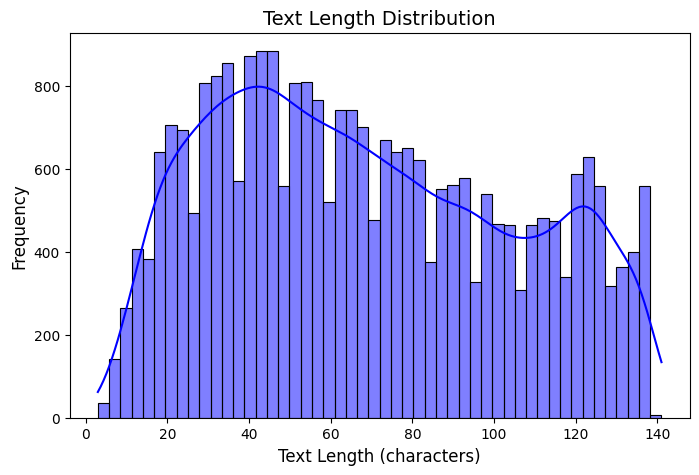

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate text lengths
train_df['text_length'] = train_df['text'].apply(len)

# Summary statistics
print("\nText Length Distribution Summary:")
print(train_df['text_length'].describe())

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution', fontsize=14)
plt.xlabel('Text Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### **Preprocessing Dataset**

In [118]:
# Combine all text in the dataset
all_text = " ".join(train_df['text'])

# Get unique characters
unique_chars = sorted(set(all_text))
print("Unique characters in the dataset:")
print(unique_chars)


Unique characters in the dataset:
['\t', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '´', '½', '¿', 'Â', 'ï']


In [119]:
def clean_text(text):
    # Replace non-breaking space with regular space
    text = text.replace('\xa0', ' ')
    # Replace fraction character
    text = text.replace('½', '1/2')
    # Remove inverted question mark
    text = text.replace('¿', '')
    # Additional custom cleaning for unexpected characters
    text = text.replace('Â', '')
    text = text.replace('ï', 'i')
    return text

# Apply to the dataset
train_df['cleaned_text'] = train_df['text'].apply(clean_text)


<ipython-input-119-c65c52ae7740>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text'] = train_df['text'].apply(clean_text)


In [120]:
train_df

,textID,text,selected_text,sentiment,text_length,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,25,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,"Sons of ****, why couldn`t they put them on t..."
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77,wish we could come see u on Denver husband l...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122,I`ve wondered about rake to. The client has ...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111,Yay good for both of you. Enjoy the break - y...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27,But it was worth it ****.


In [121]:

def normalize_text(text):
    # Replace non-standard apostrophes with standard ones
    text = unicodedata.normalize('NFKD', text)
    return text.replace('`', "'")  # Replace backticks with apostrophes

In [122]:

train_df['cleaned_text']=train_df['text'].apply(normalize_text)


<ipython-input-122-310dca51d643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text']=train_df['text'].apply(normalize_text)


In [123]:
def expand_contractions(text):
    return contractions.fix(text)

In [124]:
train_df['cleaned_text']=train_df['cleaned_text'].apply(expand_contractions)


<ipython-input-124-d45b77cdb55e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text']=train_df['cleaned_text'].apply(expand_contractions)


In [125]:
train_df['cleaned_text']

,cleaned_text
0,"I would have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why could not they put them on ..."
...,...
27476,wish we could come see you on Denver husband...
27477,I have wondered about rake to. The client ha...
27478,Yay good for both of you. Enjoy the break - y...
27479,But it was worth it ****.


In [126]:
def regexp(text):
  url_pattern = r'\shttp[s]?://\S+|www\.\S+(\s+|$)'
  email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
  pattern_mention = r'@\w+'
  pattern_num = r'\b\d\w*\b'
  single_alpha = r'\b[a-zA-Z]\b'
  repeated_char=r'(.)\1{2,}'


  text = re.sub(url_pattern,'', text)
  text = re.sub(email_pattern,'', text)
  text = re.sub(pattern_mention,'', text)
  text = re.sub(pattern_num,'', text)
  text = re.sub(single_alpha,'', text)
  text = re.sub(repeated_char, r'\1',text)

  return text.strip()

In [127]:
train_df['cleaned_text']=train_df['cleaned_text'].apply(regexp)

<ipython-input-127-40b5bb906931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text']=train_df['cleaned_text'].apply(regexp)


In [128]:
train_df['cleaned_text']

,cleaned_text
0,"would have responded, if were going"
1,So SAD will miss you here in San Diego!
2,my boss is bullying me.
3,what interview! leave me alone
4,"Sons of *, why could not they put them on the ..."
...,...
27476,wish we could come see you on Denver husband ...
27477,have wondered about rake to. The client has m...
27478,Yay good for both of you. Enjoy the break - yo...
27479,But it was worth it *.


In [129]:
# rows_with_urls = train_df[train_df['cleaned_text'].str.contains(url_pattern, na=False, regex=True)]
# # print(rows_with_urls[['textID', 'cleaned_text']])

In [130]:
# rows_with_mentions= train_df[train_df['cleaned_text'].str.contains(pattern_mention, na=False, regex=True)]
# print(rows_with_mentions[['textID', 'cleaned_text']])

In [131]:

# rows_with_num= train_df[train_df['cleaned_text'].str.contains(pattern_num, na=False, regex=True)]
# print(rows_with_num[['textID', 'cleaned_text']])

In [132]:
# rows_with_punctuation= train_df[train_df['cleaned_text'].str.contains(single_punctuation, na=False, regex=True)]
# print(rows_with_punctuation[['textID', 'cleaned_text']])

In [133]:
train_df

,textID,text,selected_text,sentiment,text_length,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,"would have responded, if were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,So SAD will miss you here in San Diego!
2,088c60f138,my boss is bullying me...,bullying me,negative,25,my boss is bullying me.
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,"Sons of *, why could not they put them on the ..."
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,77,wish we could come see you on Denver husband ...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,122,have wondered about rake to. The client has m...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,111,Yay good for both of you. Enjoy the break - yo...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,27,But it was worth it *.


In [134]:
pattern_punctuation=r'[^\w\s]'

def remove_punctuation(text):
    return re.sub(pattern_punctuation,' ',text)

In [135]:
def lower_str(text):
    return text.lower()

In [136]:
pattern_space=r'\s+'
def remove_space(text):
    return re.sub(pattern_space,' ',text).strip()

In [137]:
train_df['cleaned_text']=train_df['cleaned_text'].apply(lower_str)
train_df['cleaned_text']=train_df['cleaned_text'].apply(remove_punctuation)
train_df['cleaned_text']=train_df['cleaned_text'].apply(remove_space)

<ipython-input-137-a87d7edace2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text']=train_df['cleaned_text'].apply(lower_str)
<ipython-input-137-a87d7edace2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text']=train_df['cleaned_text'].apply(remove_punctuation)
<ipython-input-137-a87d7edace2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [138]:
# Step 2: Initialize SymSpell
# Maximum edit distance and dictionary prefix length
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Step 3: Load the dictionary
# Download the dictionary file if not already done
!wget https://github.com/wolfgarbe/SymSpell/raw/master/SymSpell/frequency_dictionary_en_82_765.txt -O frequency_dictionary_en_82_765.txt

# Load the dictionary into SymSpell
dictionary_path = "frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Step 4: Define a function for spell correction
def correct_spelling(text):
    corrected_words = []
    for word in text.split():
        # Look up suggestions for each word
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        # If suggestions exist, take the first one; otherwise, use the original word
        corrected_word = suggestions[0].term if suggestions else word
        corrected_words.append(corrected_word)
    return ' '.join(corrected_words)


# Step 5: Apply spell correction
train_df['cleaned_text'] = train_df['cleaned_text'].apply(correct_spelling)


--2025-02-17 18:43:36--  https://github.com/wolfgarbe/SymSpell/raw/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt [following]
--2025-02-17 18:43:36--  https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332881 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.05s   

2025-02-17 18:43:37

<ipython-input-138-f5216cdfd8b9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text'] = train_df['cleaned_text'].apply(correct_spelling)


In [139]:
# !pip install emoji==2.0.0

In [140]:
# import emoji

# # Function to check if a string contains an emoji
# def contains_emoji(text):
#     return bool(emoji.distinct_emoji_list(text))

# # Apply to check in your dataset (example with a specific column)
# train_df['contains_emoji'] = train_df['cleaned_text'].apply(lambda x: contains_emoji(x))

# # Check the rows where emojis are present
# print(train_df[train_df['contains_emoji'] == True])


In [141]:
t_df=train_df.copy()

In [142]:
t_df.drop(columns=['text', 'selected_text','text_length','textID'], inplace=True)

In [143]:
t_df

,sentiment,cleaned_text
0,neutral,would have responded if were going
1,negative,so sad will miss you here in san diego
2,negative,my boss is bullying me
3,negative,what interview leave me alone
4,negative,sons of why could not they put them on ﻿the re...
...,...,...
27476,negative,wish we could come see you on denver husband l...
27477,negative,have wondered about rake to ﻿the client has ma...
27478,positive,may good for both of you enjoy ﻿the break you ...
27479,positive,but it was worth it


#### **Test Data Preprocessing**

In [144]:
test_df['cleaned_text']=test_df['text'].apply(normalize_text)
test_df['cleaned_text']=test_df['cleaned_text'].apply(expand_contractions)
test_df['cleaned_text']=test_df['cleaned_text'].apply(regexp)
test_df['cleaned_text']=test_df['cleaned_text'].apply(remove_punctuation)
test_df['cleaned_text']=test_df['cleaned_text'].apply(lower_str)
test_df['cleaned_text']=test_df['cleaned_text'].apply(remove_punctuation)
test_df['cleaned_text'] = test_df['cleaned_text'].apply(correct_spelling)

In [145]:

test_df

,textID,text,sentiment,cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,last session of ﻿the day
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,shanghai is also really exciting precisely sky...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,recession hit veronique branquinho she has to ...
3,01082688c6,happy bday!,positive,happy birthday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,like it
...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,its at am am very tired but cannot sleep but t...
3530,416863ce47,All alone in this old house again. Thanks for...,positive,all alone in this old house again thanks for ﻿...
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,know what you mean my little dog is sinking in...
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,sutra what is your next youtube video going to...


In [146]:
test_df.drop(columns=['text','textID'], inplace=True)

In [147]:
test_df


,sentiment,cleaned_text
0,neutral,last session of ﻿the day
1,positive,shanghai is also really exciting precisely sky...
2,negative,recession hit veronique branquinho she has to ...
3,positive,happy birthday
4,positive,like it
...,...,...
3529,negative,its at am am very tired but cannot sleep but t...
3530,positive,all alone in this old house again thanks for ﻿...
3531,negative,know what you mean my little dog is sinking in...
3532,positive,sutra what is your next youtube video going to...


### ***Saving Dataset***

In [148]:
t_df.to_csv('/content/drive/MyDrive/Centilytics/train_cleaned.csv',index=False)
test_df.to_csv('/content/drive/MyDrive/Centilytics/test_cleaned.csv',index=False)

#### **Tokenizing**

In [149]:
from nltk.tokenize import TreebankWordTokenizer

In [150]:
tokenizer=TreebankWordTokenizer()

In [151]:

t_df['tokens']=t_df['cleaned_text'].apply(lambda x:tokenizer.tokenize(x))

In [152]:
t_df

,sentiment,cleaned_text,tokens
0,neutral,would have responded if were going,"[would, have, responded, if, were, going]"
1,negative,so sad will miss you here in san diego,"[so, sad, will, miss, you, here, in, san, diego]"
2,negative,my boss is bullying me,"[my, boss, is, bullying, me]"
3,negative,what interview leave me alone,"[what, interview, leave, me, alone]"
4,negative,sons of why could not they put them on ﻿the re...,"[sons, of, why, could, not, they, put, them, o..."
...,...,...,...
27476,negative,wish we could come see you on denver husband l...,"[wish, we, could, come, see, you, on, denver, ..."
27477,negative,have wondered about rake to ﻿the client has ma...,"[have, wondered, about, rake, to, ﻿the, client..."
27478,positive,may good for both of you enjoy ﻿the break you ...,"[may, good, for, both, of, you, enjoy, ﻿the, b..."
27479,positive,but it was worth it,"[but, it, was, worth, it]"


In [153]:
test_df['tokens']=test_df['cleaned_text'].apply(lambda x:tokenizer.tokenize(x))

In [154]:
test_df

,sentiment,cleaned_text,tokens
0,neutral,last session of ﻿the day,"[last, session, of, ﻿the, day]"
1,positive,shanghai is also really exciting precisely sky...,"[shanghai, is, also, really, exciting, precise..."
2,negative,recession hit veronique branquinho she has to ...,"[recession, hit, veronique, branquinho, she, h..."
3,positive,happy birthday,"[happy, birthday]"
4,positive,like it,"[like, it]"
...,...,...,...
3529,negative,its at am am very tired but cannot sleep but t...,"[its, at, am, am, very, tired, but, can, not, ..."
3530,positive,all alone in this old house again thanks for ﻿...,"[all, alone, in, this, old, house, again, than..."
3531,negative,know what you mean my little dog is sinking in...,"[know, what, you, mean, my, little, dog, is, s..."
3532,positive,sutra what is your next youtube video going to...,"[sutra, what, is, your, next, youtube, video, ..."


#### **lemmatization**

In [155]:
# %pip install nltk


In [156]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [157]:
lemmatizer = WordNetLemmatizer()

In [158]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

In [159]:
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    return lemmatized

In [160]:
t_df['lemmatized_tokens'] = t_df['tokens'].apply(lemmatize_tokens)

In [161]:
t_df

,sentiment,cleaned_text,tokens,lemmatized_tokens
0,neutral,would have responded if were going,"[would, have, responded, if, were, going]","[would, have, respond, if, be, go]"
1,negative,so sad will miss you here in san diego,"[so, sad, will, miss, you, here, in, san, diego]","[so, sad, will, miss, you, here, in, san, diego]"
2,negative,my boss is bullying me,"[my, boss, is, bullying, me]","[my, bos, be, bully, me]"
3,negative,what interview leave me alone,"[what, interview, leave, me, alone]","[what, interview, leave, me, alone]"
4,negative,sons of why could not they put them on ﻿the re...,"[sons, of, why, could, not, they, put, them, o...","[son, of, why, could, not, they, put, them, on..."
...,...,...,...,...
27476,negative,wish we could come see you on denver husband l...,"[wish, we, could, come, see, you, on, denver, ...","[wish, we, could, come, see, you, on, denver, ..."
27477,negative,have wondered about rake to ﻿the client has ma...,"[have, wondered, about, rake, to, ﻿the, client...","[have, wonder, about, rake, to, ﻿the, client, ..."
27478,positive,may good for both of you enjoy ﻿the break you ...,"[may, good, for, both, of, you, enjoy, ﻿the, b...","[may, good, for, both, of, you, enjoy, ﻿the, b..."
27479,positive,but it was worth it,"[but, it, was, worth, it]","[but, it, be, worth, it]"


In [162]:
t_df['lemmatized_tokens'][23475],t_df['sentiment'][23475],train_df['text'][23475]

(['yea', 'it', 'look', 'good', '\ufeffthe', 'flower', 'mean'],
 'positive',
 ' yea it looks good, the flower i mean.')

In [163]:
def remove_slash_tokens(tokens):
    # Remove tokens starting with backslash and also unwanted special characters like \ufeff
    return [token for token in tokens if not token.startswith('\\') and not unicodedata.normalize('NFKD', token).startswith('\ufeff')]

t_df['lemmatized_tokens'] = t_df['lemmatized_tokens'].apply(remove_slash_tokens)


In [164]:
for tokens in t_df['lemmatized_tokens']:
    for token in tokens:
        if token.startswith("\\") or unicodedata.normalize('NFKD', token).startswith('\ufeff'):
            print(token)

In [165]:
t_df['lemmatized_tokens'][23475],t_df['sentiment'][23475],train_df['text'][23475]

(['yea', 'it', 'look', 'good', 'flower', 'mean'],
 'positive',
 ' yea it looks good, the flower i mean.')

In [166]:
test_df['lemmatized_tokens'] = test_df['tokens'].apply(lemmatize_tokens)

In [167]:
test_df

,sentiment,cleaned_text,tokens,lemmatized_tokens
0,neutral,last session of ﻿the day,"[last, session, of, ﻿the, day]","[last, session, of, ﻿the, day]"
1,positive,shanghai is also really exciting precisely sky...,"[shanghai, is, also, really, exciting, precise...","[shanghai, be, also, really, excite, precisely..."
2,negative,recession hit veronique branquinho she has to ...,"[recession, hit, veronique, branquinho, she, h...","[recession, hit, veronique, branquinho, she, h..."
3,positive,happy birthday,"[happy, birthday]","[happy, birthday]"
4,positive,like it,"[like, it]","[like, it]"
...,...,...,...,...
3529,negative,its at am am very tired but cannot sleep but t...,"[its, at, am, am, very, tired, but, can, not, ...","[it, at, be, be, very, tired, but, can, not, s..."
3530,positive,all alone in this old house again thanks for ﻿...,"[all, alone, in, this, old, house, again, than...","[all, alone, in, this, old, house, again, than..."
3531,negative,know what you mean my little dog is sinking in...,"[know, what, you, mean, my, little, dog, is, s...","[know, what, you, mean, my, little, dog, be, s..."
3532,positive,sutra what is your next youtube video going to...,"[sutra, what, is, your, next, youtube, video, ...","[sutra, what, be, your, next, youtube, video, ..."


In [168]:
test_df.drop(columns=['tokens'], inplace=True)

In [169]:

test_df

,sentiment,cleaned_text,lemmatized_tokens
0,neutral,last session of ﻿the day,"[last, session, of, ﻿the, day]"
1,positive,shanghai is also really exciting precisely sky...,"[shanghai, be, also, really, excite, precisely..."
2,negative,recession hit veronique branquinho she has to ...,"[recession, hit, veronique, branquinho, she, h..."
3,positive,happy birthday,"[happy, birthday]"
4,positive,like it,"[like, it]"
...,...,...,...
3529,negative,its at am am very tired but cannot sleep but t...,"[it, at, be, be, very, tired, but, can, not, s..."
3530,positive,all alone in this old house again thanks for ﻿...,"[all, alone, in, this, old, house, again, than..."
3531,negative,know what you mean my little dog is sinking in...,"[know, what, you, mean, my, little, dog, be, s..."
3532,positive,sutra what is your next youtube video going to...,"[sutra, what, be, your, next, youtube, video, ..."


#### **Stopwords**

In [170]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
# stop_words = set(stopwords.words('english'))
# stop_words

In [172]:
from collections import Counter

In [173]:
ct=Counter()
for token in t_df['lemmatized_tokens']:
  ct.update(token)

In [174]:
sum(list(ct.values()))

325934

In [175]:
dict(ct.most_common(30))

{'be': 18527,
 'to': 11376,
 'you': 6665,
 'it': 6363,
 'not': 6164,
 'my': 5613,
 'and': 5243,
 'have': 5159,
 'of': 4634,
 'do': 4523,
 'in': 3930,
 'for': 3675,
 'go': 3382,
 'that': 3230,
 'get': 3212,
 'so': 3010,
 'on': 2884,
 'me': 2881,
 'day': 2494,
 'but': 2477,
 'just': 2299,
 'with': 2113,
 'at': 1917,
 'can': 1899,
 'will': 1866,
 'good': 1813,
 'all': 1724,
 'a': 1676,
 'now': 1596,
 'this': 1586}

In [176]:
stop_words=['to','the','a','you','is','my','it','and','am','in','for','have','of','that','on','me','so','do','are','just','day','with','be','was','at','can','will','get','this','s','there','your','go','all','now','today','time','we','from','about','if',]

In [177]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [178]:
t_df['filtered_tokens'] = t_df['lemmatized_tokens'].apply(remove_stopwords)
test_df['filtered_tokens'] = test_df['lemmatized_tokens'].apply(remove_stopwords)

In [179]:

t_df

,sentiment,cleaned_text,tokens,lemmatized_tokens,filtered_tokens
0,neutral,would have responded if were going,"[would, have, responded, if, were, going]","[would, have, respond, if, be, go]","[would, respond]"
1,negative,so sad will miss you here in san diego,"[so, sad, will, miss, you, here, in, san, diego]","[so, sad, will, miss, you, here, in, san, diego]","[sad, miss, here, san, diego]"
2,negative,my boss is bullying me,"[my, boss, is, bullying, me]","[my, bos, be, bully, me]","[bos, bully]"
3,negative,what interview leave me alone,"[what, interview, leave, me, alone]","[what, interview, leave, me, alone]","[what, interview, leave, alone]"
4,negative,sons of why could not they put them on ﻿the re...,"[sons, of, why, could, not, they, put, them, o...","[son, of, why, could, not, they, put, them, on...","[son, why, could, not, they, put, them, releas..."
...,...,...,...,...,...
27476,negative,wish we could come see you on denver husband l...,"[wish, we, could, come, see, you, on, denver, ...","[wish, we, could, come, see, you, on, denver, ...","[wish, could, come, see, denver, husband, lose..."
27477,negative,have wondered about rake to ﻿the client has ma...,"[have, wondered, about, rake, to, ﻿the, client...","[have, wonder, about, rake, to, client, have, ...","[wonder, rake, client, make, clear, net, only,..."
27478,positive,may good for both of you enjoy ﻿the break you ...,"[may, good, for, both, of, you, enjoy, ﻿the, b...","[may, good, for, both, of, you, enjoy, break, ...","[may, good, both, enjoy, break, probably, need..."
27479,positive,but it was worth it,"[but, it, was, worth, it]","[but, it, be, worth, it]","[but, worth]"


In [180]:
# Drop rows where the length of 'filtered_tokens' is 0
t_df = t_df[t_df['filtered_tokens'].apply(lambda words: len(words) > 0)]
for words in t_df['filtered_tokens']:
  if len(words)<=1:
    print(words)





['high']
['both']
['sorry']
['mayday']
['photoshoot']
['chill']
['tired']
['thank']
['ticket']
['absolutely']
['morning']
['neither']
['then']
['talk']
['yellow']
['tunesmith']
['thanks']
['know']
['thanks']
['simple']
['suck']
['nice']
['agree']
['work']
['count']
['brainfreeze']
['goodmorning']
['miss']
['amaze']
['headache']
['no']
['pleasure']
['stackeoverflow']
['thank']
['gorgeous']
['funny']
['deadline']
['yep']
['breast']
['listen']
['night']
['shower']
['work']
['well']
['not']
['clickable']
['youtube']
['facebook']
['bear']
['welcome']
['sorry']
['good']
['thank']
['mother']
['bash']
['frustrated']
['know']
['mean']
['starbucks']
['ocean']
['twitter']
['thanks']
['work']
['yeah']
['only']
['beebe']
['sweetheart']
['thank']
['suck']
['tomorrow']
['awe']
['know']
['bicycle']
['enjoy']
['awesome']
['work']
['suck']
['thanks']
['yep']
['life']
['sleep']
['ugh']
['well']
['thanks']
['cool']
['email']
['teardrop']
['symphonic']
['hike']
['radio']
['pee']
['morning']
['tee']
['where

In [181]:
# for words in t_df['filtered_tokens']:
#   if len(words)==0:
#     print(words)

In [182]:
t_df['filtered_tokens'][8115],t_df['sentiment'][8115],train_df['text'][8115]

(['home', 'work', 'why', 'awake', 'still', 'up', 'hour'],
 'neutral',
 'hooome from work. why am i awake still? up in 5 hours')

#### **Embedding**

In [213]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip


In [214]:
# !unzip glove.6B.zip


In [185]:

def load_glove_embeddings(file_path):
    glove_embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_embeddings[word] = vector
    return glove_embeddings

# Load the GloVe embeddings (50D vector)
glove_embeddings = load_glove_embeddings('/content/glove.6B.100d.txt')


In [186]:
def get_glove_vector(tokens, glove_embeddings, embedding_dim=100):
    vectors = []
    for token in tokens:
        if token in glove_embeddings:
            vectors.append(glove_embeddings[token])
        else:
            vectors.append(np.zeros(embedding_dim))  # Use zero vector if word is not in GloVe
    return np.mean(vectors, axis=0)  # Compute the average of word vectors

# Apply the function to compute the average GloVe vector for each tweet
t_df['avg_glove_vector'] = t_df['filtered_tokens'].apply(lambda x: get_glove_vector(x, glove_embeddings))
test_df['avg_glove_vector'] = test_df['filtered_tokens'].apply(lambda x: get_glove_vector(x, glove_embeddings))


<ipython-input-186-a789eb2b507d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['avg_glove_vector'] = t_df['filtered_tokens'].apply(lambda x: get_glove_vector(x, glove_embeddings))
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [187]:
t_df['avg_glove_vector'][0]

array([-0.1116895 ,  0.059819  ,  0.05187   , -0.16959499, -0.41697997,
       -0.109845  , -0.16392   ,  0.149685  ,  0.3391975 ,  0.033773  ,
       -0.21491   ,  0.01265502,  0.04108499, -0.36421502, -0.303705  ,
       -0.48944002, -0.27997   ,  0.64733   , -0.97719496, -0.19799   ,
        0.08710001, -0.591615  ,  0.02348   ,  0.03021   , -0.483966  ,
        0.13335   , -0.280765  , -0.2734354 ,  0.48522   , -0.01469   ,
        0.1626205 ,  0.84155   , -0.199975  ,  0.281875  ,  0.339235  ,
        0.47626448,  0.2497075 , -0.245355  , -0.16418001, -0.0636875 ,
       -0.69533503,  0.059335  , -0.3203498 , -0.376525  , -0.216055  ,
        0.1995655 ,  0.15774   , -0.387685  , -0.228345  , -1.1900499 ,
        0.419804  ,  0.03200001,  0.44808   ,  0.98800504, -0.0274485 ,
       -1.759805  ,  0.197681  , -0.531685  ,  1.4205999 ,  0.5179965 ,
       -0.20539   ,  0.59835005, -0.432425  , -0.23276502,  0.97682   ,
       -0.013945  ,  0.07288501,  0.780775  , -0.208184  , -0.37

In [188]:
t_df['avg_glove_vector'][0].shape

(100,)

In [189]:
test_df['avg_glove_vector'][0]

array([ 3.34833364e-02, -7.81099995e-02,  4.43006655e-01, -4.38266695e-02,
        2.40000586e-04, -3.26660002e-02,  1.99319335e-01,  5.29136658e-01,
       -4.71513331e-01, -3.33659987e-01,  1.07026666e-01, -2.06796656e-01,
        8.86810000e-02, -3.61123328e-01, -8.88806693e-02,  1.25676004e-01,
       -3.39172671e-01, -3.18323324e-01, -2.15599996e-01, -3.18172676e-01,
        4.19103344e-01, -2.75363336e-01,  3.65433320e-02,  3.54563985e-01,
        1.55075671e-01, -3.90540004e-01, -7.83006673e-02, -2.34233340e-02,
        9.50666765e-04,  5.46666632e-02, -2.06346671e-01, -9.63026639e-02,
       -2.98776676e-02,  6.52739989e-02, -3.15350006e-01,  2.80196667e-01,
       -1.41244334e-01,  6.22366617e-02, -8.85253325e-02, -4.36943322e-02,
       -4.25856650e-01, -2.53537672e-01,  5.65553347e-01,  2.53826659e-02,
       -1.47340010e-01, -1.42871335e-01, -7.52133230e-02, -4.82540011e-01,
        2.66226669e-01, -8.67633343e-01, -1.91184329e-01, -3.16223343e-01,
        1.56893328e-01,  

### **Label Encoding**

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:

label_encoder=LabelEncoder()

In [192]:
t_df['sentiment']=label_encoder.fit_transform(t_df['sentiment'])
test_df['sentiment']=label_encoder.fit_transform(test_df['sentiment'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


<ipython-input-192-ca18a94e3c21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['sentiment']=label_encoder.fit_transform(t_df['sentiment'])


In [193]:
t_df

,sentiment,cleaned_text,tokens,lemmatized_tokens,filtered_tokens,avg_glove_vector
0,1,would have responded if were going,"[would, have, responded, if, were, going]","[would, have, respond, if, be, go]","[would, respond]","[-0.1116895, 0.059819, 0.051869996, -0.1695949..."
1,0,so sad will miss you here in san diego,"[so, sad, will, miss, you, here, in, san, diego]","[so, sad, will, miss, you, here, in, san, diego]","[sad, miss, here, san, diego]","[0.005078, -0.124372005, 0.3149078, -0.4309756..."
2,0,my boss is bullying me,"[my, boss, is, bullying, me]","[my, bos, be, bully, me]","[bos, bully]","[-0.047564983, 0.072155006, 0.25788, -0.81014,..."
3,0,what interview leave me alone,"[what, interview, leave, me, alone]","[what, interview, leave, me, alone]","[what, interview, leave, alone]","[-0.16136003, -0.008057505, 0.46631104, -0.303..."
4,0,sons of why could not they put them on ﻿the re...,"[sons, of, why, could, not, they, put, them, o...","[son, of, why, could, not, they, put, them, on...","[son, why, could, not, they, put, them, releas...","[0.04687379, 0.12488689, 0.28630567, -0.449234..."
...,...,...,...,...,...,...
27476,0,wish we could come see you on denver husband l...,"[wish, we, could, come, see, you, on, denver, ...","[wish, we, could, come, see, you, on, denver, ...","[wish, could, come, see, denver, husband, lose...","[0.05127527, 0.19242945, 0.3857887, -0.3544867..."
27477,0,have wondered about rake to ﻿the client has ma...,"[have, wondered, about, rake, to, ﻿the, client...","[have, wonder, about, rake, to, client, have, ...","[wonder, rake, client, make, clear, net, only,...","[-0.06717961, 0.09744455, 0.3263432, -0.192317..."
27478,2,may good for both of you enjoy ﻿the break you ...,"[may, good, for, both, of, you, enjoy, ﻿the, b...","[may, good, for, both, of, you, enjoy, break, ...","[may, good, both, enjoy, break, probably, need...","[-0.2147523, 0.09816498, 0.15239637, -0.043302..."
27479,2,but it was worth it,"[but, it, was, worth, it]","[but, it, be, worth, it]","[but, worth]","[0.41904598, 0.72567, 0.67269003, -0.42361498,..."


In [194]:
test_df.shape

(3534, 5)

In [195]:
final_test=test_df[['sentiment','cleaned_text']]
final_test.to_csv('/content/drive/MyDrive/Centilytics/final_test.csv',index=False)
final_test.shape

(3534, 2)

### **Converting into array**

In [196]:
print([len(vec) for vec in t_df['avg_glove_vector'][:5]])

[100, 100, 100, 100, 100]


In [197]:
import numpy as np

# Ensure that all vectors are of length 50 by padding or truncating
def pad_glove_vectors(x, max_length=100):
    if isinstance(x, np.ndarray) or isinstance(x, list):  # Check if it's a list or numpy array
        if len(x) != max_length:
            return np.pad(x, (0, max_length - len(x)), 'constant')  # Pad or truncate to max_length
        return x
    else:
        # If x is not a list or array, handle the case (e.g., return a zero vector)
        return np.zeros(max_length)

# Apply the padding function to ensure all vectors are of length 50
t_df['avg_glove_vector'] = t_df['avg_glove_vector'].apply(lambda x: pad_glove_vectors(x, 100))
test_df['avg_glove_vector'] = test_df['avg_glove_vector'].apply(lambda x: pad_glove_vectors(x, 100))

# Convert the lists into a NumPy array
X_train = np.array(t_df['avg_glove_vector'].tolist())
X_test = np.array(test_df['avg_glove_vector'].tolist())

# Check the shape to confirm all vectors are the same length
print(X_train.shape)
print(X_test.shape)


<ipython-input-197-2ffeafd7fb6a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['avg_glove_vector'] = t_df['avg_glove_vector'].apply(lambda x: pad_glove_vectors(x, 100))


(27431, 100)
(3534, 100)


In [198]:
y_train=t_df['sentiment'].to_numpy()
y_test=test_df['sentiment'].to_numpy()
print(type(y_train))


<class 'numpy.ndarray'>


### **Model**

In [199]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [200]:
svm_model = SVC(kernel='rbf',C=1,gamma=0.1, probability=True)

In [201]:
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy}")


Accuracy of the model: 0.6539332201471421


In [202]:
import joblib
svm_model_filename = '/content/drive/MyDrive/Centilytics/svm_model.joblib'
joblib.dump(svm_model, svm_model_filename)

['/content/drive/MyDrive/Centilytics/svm_model.joblib']

In [203]:
# svm_model2 = SVC(kernel='rbf',C=10,gamma=0.01, probability=True)

In [204]:
# svm_model2.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy of the model: {accuracy}")

In [205]:
# svm_model3 = SVC(kernel='rbf',C=0.1,gamma=1, probability=True)

In [206]:
# svm_model3.fit(X_train, y_train)

# y_pred = svm_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy of the model: {accuracy}")

In [207]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix (optional)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62      1001
           1       0.60      0.71      0.65      1430
           2       0.74      0.65      0.69      1103

    accuracy                           0.65      3534
   macro avg       0.67      0.65      0.65      3534
weighted avg       0.66      0.65      0.65      3534

Confusion Matrix:
 [[ 578  357   66]
 [ 229 1017  184]
 [  67  320  716]]


In [211]:
def predict_sentiment(user_input):
    """
    Takes raw user input, applies all preprocessing steps, generates a GloVe vector,
    and predicts sentiment.
    """
    # Step 1: Preprocess the text
    def preprocess_text(text):
        text = clean_text(text)               # Clean special characters and encoding issues
        text = normalize_text(text)           # Normalize text
        text = expand_contractions(text)      # Expand contractions
        text = regexp(text)                   # Remove URLs, mentions, numbers, etc.
        text = remove_punctuation(text)       # Remove punctuation
        text = lower_str(text)                # Convert to lowercase
        text = remove_space(text)             # Remove extra spaces
        text = correct_spelling(text)         # Correct spelling
        return text

    # Apply preprocessing
    processed_text = preprocess_text(user_input)

    # Step 2: Tokenization and Lemmatization
    tokens = tokenizer.tokenize(processed_text)  # Tokenize the text
    lemmatized_tokens = lemmatize_tokens(tokens) # Lemmatize tokens
    filtered_tokens = remove_stopwords(lemmatized_tokens)  # Remove stopwords

    # Step 3: Generate GloVe vector
    glove_vector = get_glove_vector(filtered_tokens, glove_embeddings)
    glove_vec = np.transpose(glove_vector)
    glove_vec = glove_vec.reshape(1, -1)  # Reshape to a 1D array

    # Step 4: Predict sentiment using the model
    y_prob = svm_model.predict_proba(glove_vec)

    # Step 5: Map numeric labels to sentiment labels
    label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
    formatted_probabilities = {label_mapping[label]: prob for label, prob in enumerate(y_prob[0])}

    # Print the probabilities
    for sentiment, probability in formatted_probabilities.items():
        print(f"{sentiment}: {probability:.4f}")


In [212]:
# Example Usage
user_input = "I like this dress but its colour is not good"
predict_sentiment(user_input)





negative: 0.0657
neutral: 0.4535
positive: 0.4808
